# Lagrange Multipliers optimization

In [35]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import scipy.optimize as so

### Optimization problem

Maximize :  $ f(x) = x + y $  
Under constraint:  $ x^2 + y^2 = 1 $

In [36]:
x = np.linspace(-1.5, 1.5)
[x, y] = np.meshgrid(x, x)

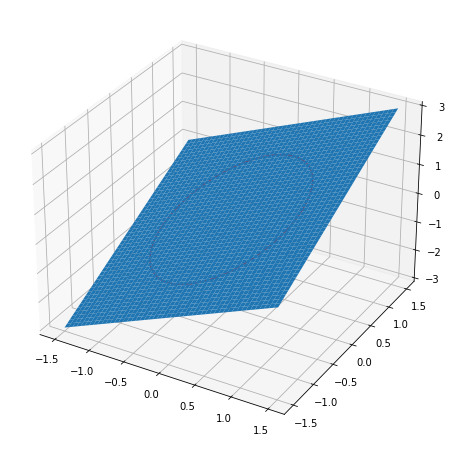

In [38]:
fig = plt.figure(figsize=[16,8])
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, x+y)

theta = np.linspace(0,2* np.pi);
r = 1.0
x1 = r * np.cos(theta)
y1 = r * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-');

### Build Lagrange multiplier 
Augmented function including the contraint equalized to zero and the lambda multiplier

$\large L(x,y, \lambda) = x + y + \lambda (x^2 + y^2 - 1)$

In [52]:
def L(X):
    x, y, lmbda = X
    return x + y + lmbda * (x**2 + y**2 - 1)

### Find partial derivative
Incremental quotient (for a small step of x = h)   
Aternative approach: symbolic derivative calculation (see sym_derivatives)

$\Large \frac{\partial{x}}{dx} = \frac{ L(x+dx) \; - L(x-dx) }{ 2h } = \frac{ L(x+h) \; - L(x-h) }{ 2h } $

In [61]:
def dL(X):
    dL = np.zeros(len(X))
    h = 1e-3 
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dL[i] = (L(X+dX) - L(X-dX)) / (2*h);
    return dL

### Solve minimization and maximization
When derivative is zero, we have a max or min.

In [67]:
x=1
y=1
lmbda = 0
X = [x,y,lmbda]
x_min = so.fsolve(dL, X)
print('\nMinimum')
print('x =', x_min)
print('f(x) =', L(x_min))

x=-1
y=-1
lmbda = 0
X = [x,y,lmbda]
x_max = so.fsolve(dL, X)
print('\nMaximum')
print('x =', x_max)
print('f(x) =', L(x_max))


Minimum
x = [ 0.70710678  0.70710678 -0.70710678]
f(x) = 1.4142135623730951

Maximum
x = [-0.70710678 -0.70710678  0.70710678]
f(x) = -1.414213562373095


### Credits & Links

https://kitchingroup.cheme.cmu.edu/blog/2013/02/03/Using-Lagrange-multipliers-in-optimization/  
http://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09H_Constrained_Optimization.html